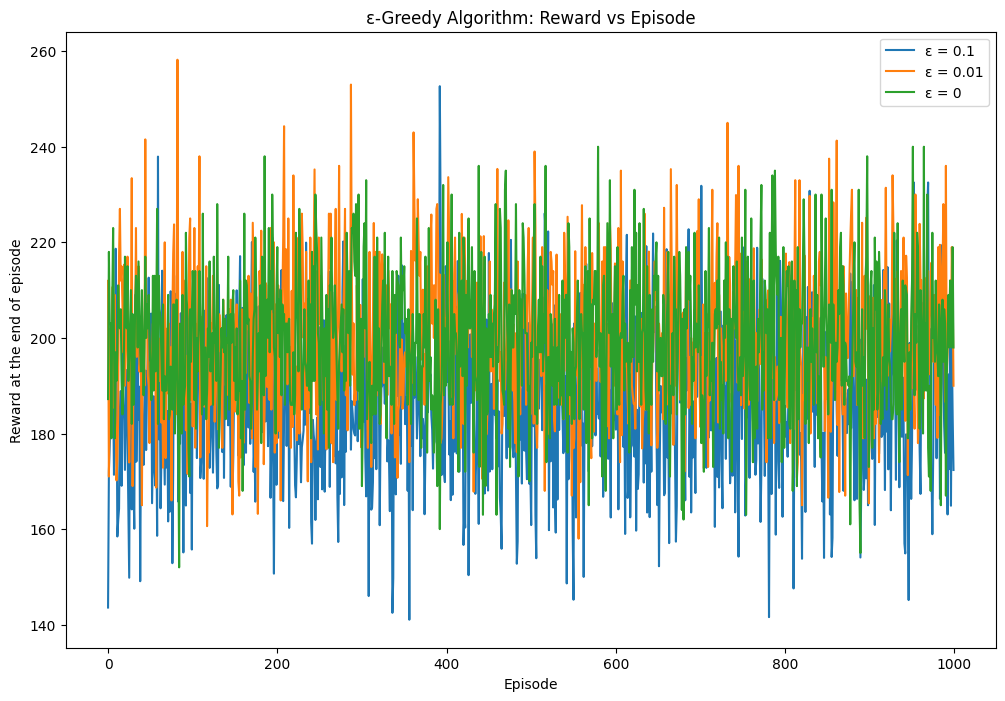

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the reward functions for each arm
def reward_arm_0():
    return np.random.normal(0, 1)

def reward_arm_1():
    return 3 if np.random.rand() < 0.5 else -4

def reward_arm_2():
    return np.random.poisson(2)

def reward_arm_3():
    return np.random.normal(1, 2)

def reward_arm_4():
    return np.random.exponential(1)

def reward_arm_5():
    return np.random.choice([reward_arm_0, reward_arm_1, reward_arm_2, reward_arm_3, reward_arm_4])()

reward_functions = [reward_arm_0, reward_arm_1, reward_arm_2, reward_arm_3, reward_arm_4, reward_arm_5]

# ε-Greedy algorithm
def epsilon_greedy(epsilon, num_episodes, num_steps):
    num_arms = len(reward_functions)
    q_values = np.zeros(num_arms)  # Estimated rewards for each arm
    action_counts = np.zeros(num_arms)  # Count of times each arm is selected
    rewards_per_episode = []

    for episode in range(num_episodes):
        total_reward = 0

        for step in range(num_steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(num_arms)  # Explore
            else:
                action = np.argmax(q_values)  # Exploit

            reward = reward_functions[action]()
            action_counts[action] += 1
            q_values[action] += (reward - q_values[action]) / action_counts[action]
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

# Parameters
num_episodes = 1000
num_steps = 100
epsilons = [0.1, 0.01, 0]

# Run ε-Greedy algorithm for different epsilon values
results = {}
for epsilon in epsilons:
    results[epsilon] = epsilon_greedy(epsilon, num_episodes, num_steps)

# Plotting the results
plt.figure(figsize=(12, 8))
for epsilon, rewards in results.items():
    plt.plot(range(num_episodes), rewards, label=f'ε = {epsilon}')
plt.xlabel('Episode')
plt.ylabel('Reward at the end of episode')
plt.title('ε-Greedy Algorithm: Reward vs Episode')
plt.legend()
plt.show()

